In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [25]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/50
31/31 [==============================] - 1s 7ms/step - loss: 0.4483 - accuracy: 0.8446 - val_loss: 0.5231 - val_accuracy: 0.7838
Epoch 2/50
31/31 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8446 - val_loss: 0.4755 - val_accuracy: 0.7838
Epoch 3/50
31/31 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8446 - val_loss: 0.4583 - val_accuracy: 0.7838
Epoch 4/50
31/31 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8547 - val_loss: 0.4258 - val_accuracy: 0.7928
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8729 - val_loss: 0.4473 - val_accuracy: 0.7928
Epoch 6/50
31/31 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8749 - val_loss: 0.4079 - val_accuracy: 0.8649
Epoch 7/50
31/31 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8860 - val_loss: 0.4169 - val_accuracy: 0.8288
Epoch 8/50
31/31 [==

In [29]:
model.evaluate(X_train, y_train)


35/35 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.9029


[0.2587493658065796, 0.9029037952423096]

In [30]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8723


[0.3056045174598694, 0.8722826242446899]

In [31]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

12/12 [==============================] - 0s 956us/step
ROC AUC Score: 0.8622127146069881


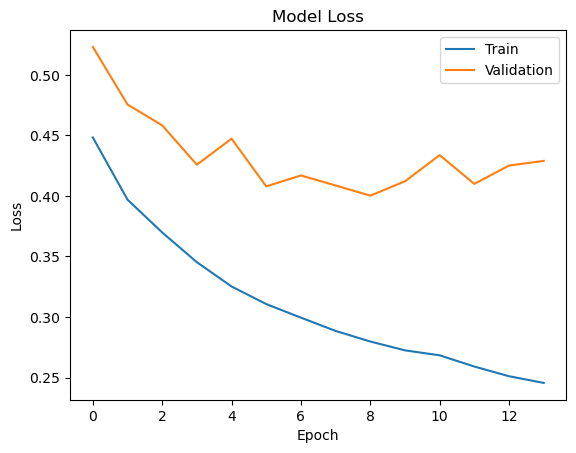

In [32]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()